In [1]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stat
import seaborn as sns
%matplotlib inline


In [2]:
#Import/Read Dataset
dataset_df = pd.read_csv("House Prices.csv")
# dataset_df.describe()
dataset_df['price'].describe()

count      1000.00000
mean      75086.47110
std       22526.24462
min       23919.44000
25%       57493.73000
50%       74970.70000
75%       91349.24750
max      134557.20000
Name: price, dtype: float64

**Performing EDA / Visualizing the Dataset**

In this section, the dataset was visualized and explored using various methods:

**a. Dataset Information**
The `info()` method was used to obtain an overview of the dataset, including the number of columns, rows, and data types of each column.

**b. Exploring  Rows**
The `head()` method was employed with a parameter of 10 to display the first 10 rows of the dataframe, allowing a quick glimpse of the data's structure and content.




In [3]:
#Perfoming EDA through info and head methods
dataset_df.info()
dataset_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   square_footage  1000 non-null   float64
 1   price           1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


,square_footage,price
0,1932.65,66690.35
1,4340.14,111116.52
2,3464.18,83877.06
3,3487.12,81352.80
4,3067.75,96720.25
5,1935.86,66420.62
6,2891.17,81435.23
7,2203.01,86729.19
8,3512.30,118094.00
9,3890.66,103916.88


**c. Pair Plot and Scatter plot Analysis**

A pair plot was generated, consisting of histograms and scatter plots, to visualize the distribution and relationships among variables in the dataset. This analysis provided insights into the range of data points and the dispersion of data, offering clues about the correlation between square footage and price.

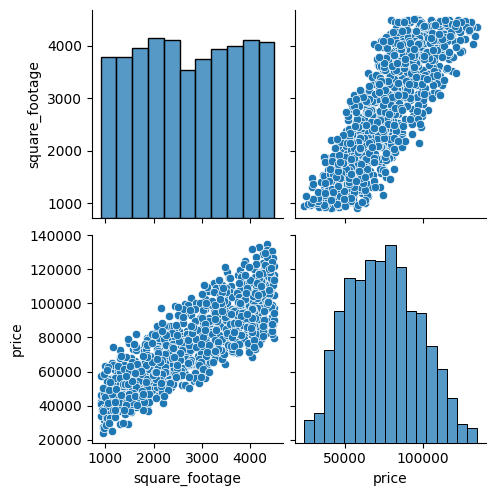

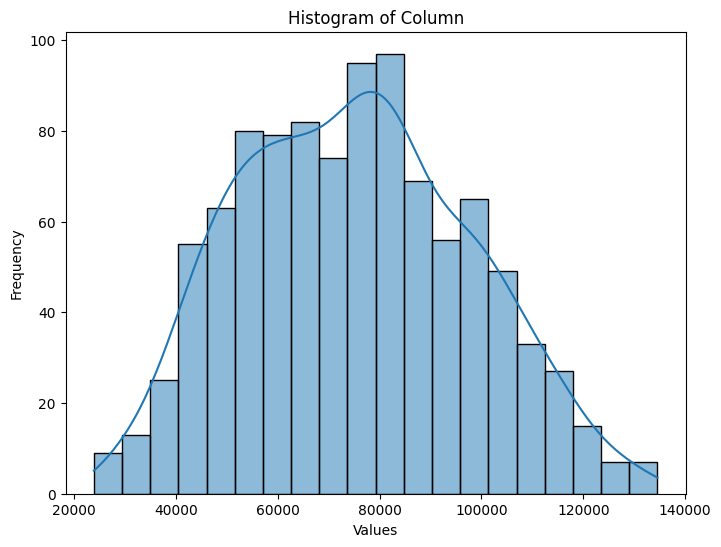

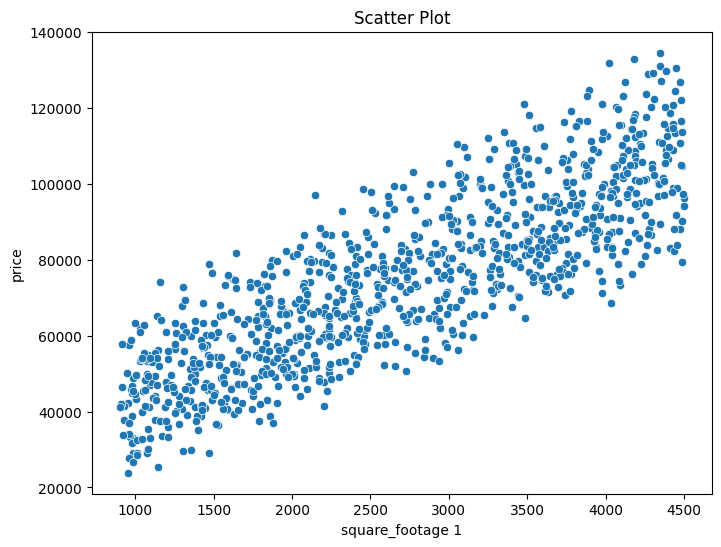

In [4]:

sns.pairplot(dataset_df)
plt.show()

# Alternatively, you can create specific plots based on your analysis needs, for example:
# Histogram of a specific column
plt.figure(figsize=(8, 6))
sns.histplot(dataset_df['price'], bins=20, kde=True)
plt.title('Histogram of Column')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

# Scatter plot of two numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='square_footage', y='price', data=dataset_df)
plt.title('Scatter Plot')
plt.xlabel('square_footage 1')
plt.ylabel('price')
plt.show()


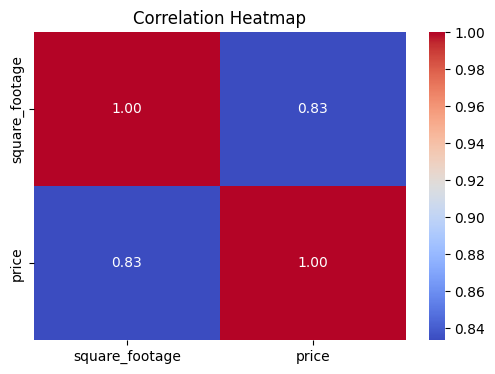

square_footage    0.833411
price             1.000000
Name: price, dtype: float64
Pearson corr. coef 0.8334105319708631 and P-value is 2.8179973064407554e-259


In [5]:


#More visuals using heatmap on correlation
# sns.heatmap(dataset_df.corr())
correlation_matrix = dataset_df.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print(dataset_df.corr()['price'])
corr_coef, p_val = stat.pearsonr(dataset_df['square_footage'], dataset_df['price'])
print(f"Pearson corr. coef {corr_coef} and P-value is {p_val}")



In [6]:
dataset_df['square_footage'].describe()


count    1000.000000
mean     2719.612890
std      1043.140412
min       902.430000
25%      1840.417500
50%      2695.180000
75%      3639.622500
max      4498.680000
Name: square_footage, dtype: float64

In [7]:
dataset_df['price'].describe()

count      1000.00000
mean      75086.47110
std       22526.24462
min       23919.44000
25%       57493.73000
50%       74970.70000
75%       91349.24750
max      134557.20000
Name: price, dtype: float64

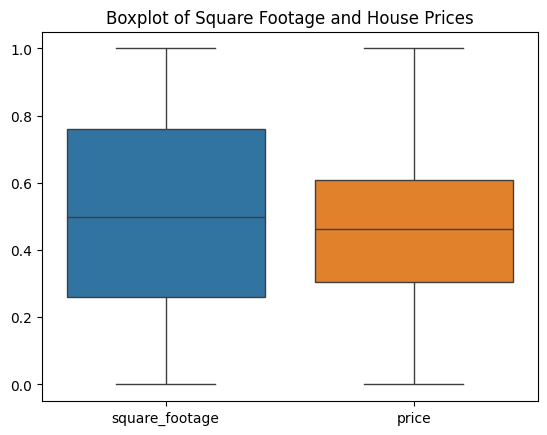

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(dataset_df), columns=dataset_df.columns)

plt.figure()
sns.boxplot(data=df_normalized)
plt.title('Boxplot of Square Footage and House Prices')
plt.show()


**Discuss the preliminary observations about the dataset.**

=> The correlation heatmap and the correlation matrix based on price were generated to visualize and observe the relationship between the square_footage and the price. The observation showed the Pearson correlation. coef 0.8334105319708631 and P-value is 2.8179973064407554e-259 between the square_footage and the price. This represents that square_footage and the **price relation is strong and is positive**.
Similarly, the **describe()** method was used to see the central tendency and the measure of the variability. The predictors and the target in the dataset looks good to process further for train and test.

Moreover, the normalization was carried out using MinMaxScaler class , and was visualized boxplot to identify the outlier, if there is any.

In [9]:
X = dataset_df.iloc[:,:-1].values # Accessing the Square_foot - independent variable array.
y = dataset_df.iloc[:,-1].values #Accessing the Price - dependent variable array (the last one is the target to be predicted so).


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.2 , random_state = 42)


**Fit a regression model to predict the house `price` based on the house `square_footage`**

After the train and test split were carried out, with test_size of 20 % and train_size 80 %, maintaing the random_state as 42 to generate the controlled random sets for model fitting, the LinearRegression model was imported to fit where training data X_train and y_train was fetched. Later, predict() method was used to predict the price (y_pred) of the house based on the input test square_footage (X_test) data. The fit and the predict code are given below.

In [11]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred =regression_model.predict(X_test)
print(y_pred)

[ 49850.87327708  89336.50519559  59182.87141343  97447.98576731
  93224.70219959  80985.54798044  85019.96128975  98688.20367469
  52788.03171672  62980.33839855  50687.86673803  44106.50636507
  43779.73370746 105278.60090212  57711.67150581  75862.19370757
  67420.86794772 104155.50062866  94193.27226162  68473.30001922
  56374.9399927   97627.63843416  77171.81465727  97583.53858435
  99153.96315404  78068.99356899  48052.90071185  92492.1747763
  75550.60296546  53053.71523811  74253.63361202  75921.83694706
 105768.57915145  57905.60240273  90534.61136114  55406.55066776
  90569.4936194   98175.63328919  86094.98549743  67700.468225
  82929.3753768   72508.79775107  50707.38634368  92590.31501584
  91957.55446589  44843.19074141  88275.93995507  70065.77451382
  69647.0066777   71707.40949672  80132.10744435  63725.69815519
  80253.74350551  81856.33927711  89734.30752934  88147.43588451
  62778.99728097 103207.89606901  96011.84885504  52237.14506826
  63395.1300187   88207.6213

In [13]:
print(y_test)

[ 29472.88 109092.8   76171.4   94505.38  89701.05  60394.35  95164.18
  83317.4   78992.    52864.36  45703.2   28949.15  45817.6  100764.
  60352.26  65738.58  68788.86 122402.2   76203.9   60686.    50541.2
 108492.44  80863.76  87934.16  98131.01  89853.4   53957.72  83226.98
  50617.7   60255.3   74598.76  81844.8  106569.67  44146.5   79661.71
  66176.57 114619.2   99150.6   73060.83  72586.08  65201.44  77540.32
  59775.54  74945.92  71591.12  53419.26 108871.88  61873.87  73869.1
  77953.98  70958.19  86481.08  91794.4   83205.05  95963.    89155.8
  58959.1  101174.94 105106.6   57040.39  64469.6  105272.72  69923.2
  84444.08  56384.48  65908.35 110490.71  90045.36  42191.7   79679.8
  78031.68  94722.6   63774.48  54181.52  92568.07  95400.    70248.
  73475.35  73247.92  86076.65 101256.08  93363.82  72973.85  91351.55
  94039.2   89918.3   88219.72  36664.14  74358.6   43500.43  90594.27
  76857.7   71876.45  66727.6   75903.94  53743.    81142.3   65726.16
  73934.38  998

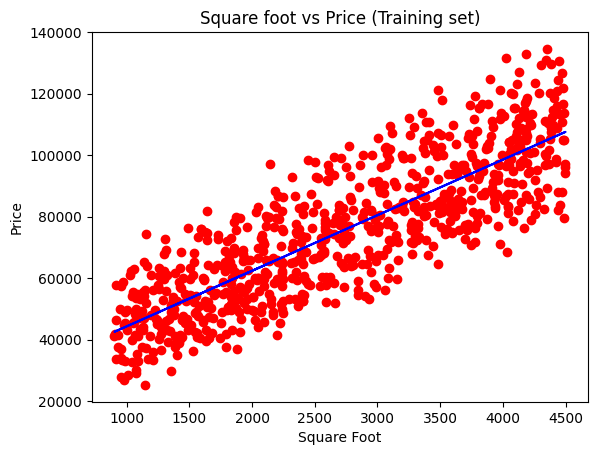

In [14]:
# visualizing the results
#plot for the TRAIN
  
plt.scatter(X_train, y_train, color='red') # plotting the observation line
plt.plot(X_train, regression_model.predict(X_train), color='blue') # plotting the regression line
plt.title("Square foot vs Price (Training set)") # stating the title of the graph
  
plt.xlabel("Square Foot") # adding the name of x-axis
plt.ylabel("Price") # adding the name of y-axis
plt.show() # specifies end of graph

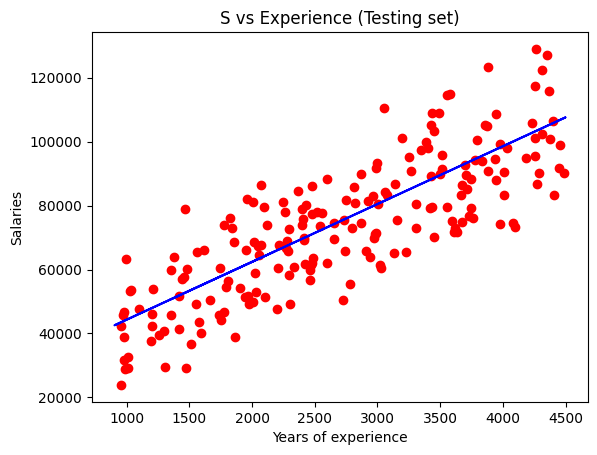

In [15]:
#plot for the TEST
  
plt.scatter(X_test, y_test, color='red') 
plt.plot(X_train, regression_model.predict(X_train), color='blue') # plotting the regression line
plt.title("S vs Experience (Testing set)")
plt.xlabel("Years of experience") 
plt.ylabel("Salaries") 
plt.show() 

In [38]:
print(regression_model.coef_)


[18.07370894]


In [17]:
print(regression_model.intercept_)

26253.115938269286


In [18]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6647480578175518

**Evaluate and discuss the model goodness of fit**

The R-squared score of 0.66 indicates that the model explains 66% of the variance in the dependent variable. Overall, a R-squared score of 0.66 suggests that the model provides a reasonably (mid) good fit to the data. This shows that the model is not so confident in predicting the correct instance of the price for the given value of the square footage. However, it's essential to interpret this value in conjunction with other metrics and consider the context of the problem to assess the model's effectiveness accurately.
Hyperparameter tuning can be carried out to make a model more accurate and confident.


# Multiple Linear Regression
<hr style="border:1px solid orange"> </hr>

In [19]:
car_dataframe = pd.read_csv("Car Prices.csv")


In [20]:
car_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [21]:
car_dataframe.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Preprocess and clean the dataset:**

        - Dealing with the missing data
        - Dealing with the irregular data (outliers)
        - Dealing with unnecessary data
        - Dealing with the inconsistent data
        - Encoding categorical data 




**A. Dealing with the missing data**
> Below is the code that was used to find if there is any null or the blank values on the car_dataframe dataset

In [22]:
# Identify missing values
missing_values = car_dataframe.isnull().any()
print(missing_values) #Printing the series after checking missing values


car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool


**B.Dealing with unnecessary data**
> Car_ID and the CarName two columns were **removed** as they were not really contributing features for the prediction of the car price. Moreover, the model was also tested in the presence of their presence and in their absence.


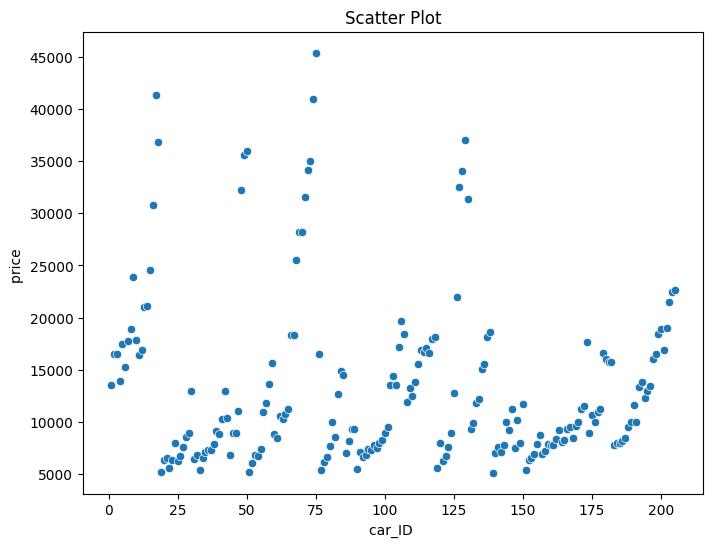

In [23]:
# Scatter plot of two numeric columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='car_ID', y='price', data=car_dataframe)
plt.title('Scatter Plot')
plt.xlabel('car_ID ')
plt.ylabel('price ')
plt.show()

**Removed un-necessary columns**
> Dropping car_ID and CarName column

In [24]:
car_dataframe = car_dataframe.drop(columns=['car_ID','CarName'])

**D.Dealing with the inconsistent data**
> One of the data value was found to be inconsistent in the CarName column, and the inconsistent data was handled as the carName column was removed indicating as an un-necessary column, as it was less contributing.

**E.Dealing with the Irregular Data (Outliers)**

To handle outliers in the dataset, the following steps were undertaken:

**1. Outlier Detection**
To detect outliers, the z-score and boxplot were utilized. These methods provide insights into the distribution of data points and identify potential outliers.

**2. Transformation of Outliers**
Upon observing the presence of outliers, they were transformed through imputation. This involved replacing outlier values with the mean values calculated from their respective columns.

**Implementation**
The steps were implemented as follows:

1. **Visualization of Outliers**: The z-score and boxplot were used to visualize outliers in the dataset.
2. **Outlier Transformation**: Outliers were identified and replaced with the mean values calculated from their respective columns.
3. **DataFrame Update**: The car_dataframe was updated with the transformed outlier values.

These measures help mitigate the impact of outliers on the analysis and ensure more robust and reliable results.

**CODE CAN BE FOUND BELOW**


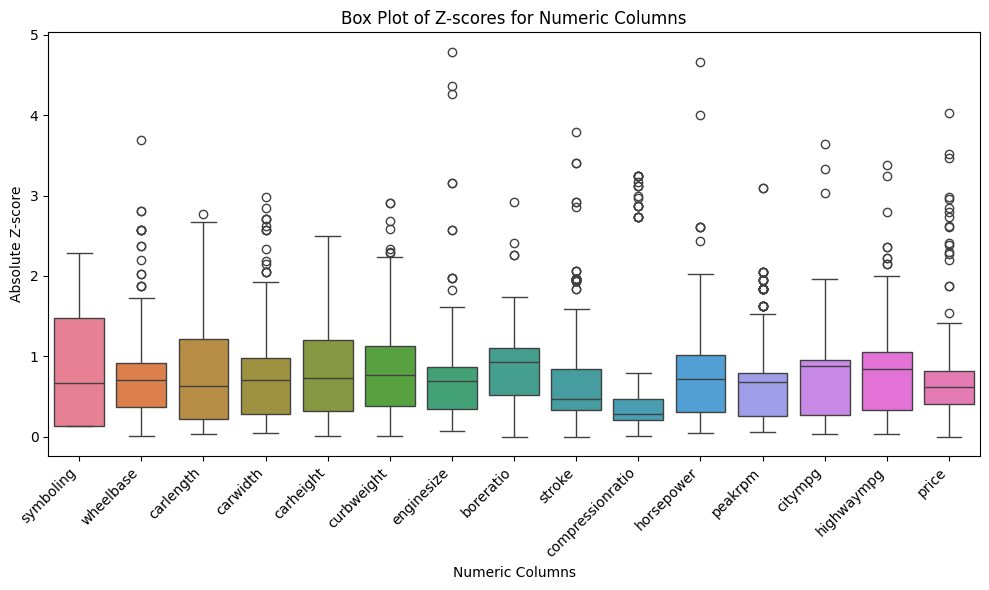

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')


/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_3958/3024226240.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '290.8' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  car_dataframe.loc[outlier_mask[column], column] = outlier_columns_mean[column]
/var/folders/hy/3_vn5bpn6j3_b20776zw1zpr0000gn/T/ipykernel_3958/3024226240.py:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '53.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  car_dataframe.loc[outlier_mask[column], column] = outlier_columns_mean[column]


In [25]:

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Compute Z-scores for numeric columns
numeric_columns = car_dataframe.select_dtypes(include=['number'])
z_scores = stats.zscore(numeric_columns)

# Create a DataFrame of absolute Z-scores
abs_z_scores_df = pd.DataFrame(np.abs(z_scores), columns=numeric_columns.columns)

# Plot box plot for Z-scores of each numeric column
plt.figure(figsize=(10, 6))
sns.boxplot(data=abs_z_scores_df)
plt.title('Box Plot of Z-scores for Numeric Columns')
plt.xlabel('Numeric Columns')
plt.ylabel('Absolute Z-score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


from sklearn.preprocessing import RobustScaler

# # Calculate Z-scores

abs_z_scores = np.abs(z_scores)


# Identify outlier values
outlier_mask = abs_z_scores > 3
outlier_values = car_dataframe[outlier_mask]


# Get numeric columns only
numeric_columns = car_dataframe.select_dtypes(include=np.number).columns
print(numeric_columns)

# Calculate mean value of columns containing outliers
outlier_columns_mean = outlier_values.mean()

# Replace outlier values with mean value of respective columns
for column in numeric_columns:
    car_dataframe.loc[outlier_mask[column], column] = outlier_columns_mean[column]






**F. Encoding categorical data**
> Performed one-hot encoding and transform boolean value to binary representation.

In [26]:
# # Identify categorical columns
categorical_cols = car_dataframe.select_dtypes(exclude=['number']).columns.tolist()

# # Perform one-hot encoding for nominal categorical columns

car_dataframe = pd.get_dummies(car_dataframe, columns=categorical_cols)
# Assuming 'car_dataframe' is your DataFrame
# Assuming 'car_dataframe' is your DataFrame
car_dataframe = car_dataframe.map(lambda x: 1 if x == True else (0 if x == False else x))


In [27]:
#re-indexing of target column which changed during transformation
# # Assuming 'car_dataframe' is your DataFrame and 'column_index' is the index of the column you want to move
column_name = 'price'
column_index = car_dataframe.columns.get_loc(column_name)
# # Create a list of column names with the specified column moved to the last position
new_column_order = list(car_dataframe.columns[:column_index]) + list(car_dataframe.columns[column_index+1:]) + [column_name]

# Reindex the DataFrame with the new column order
car_dataframe = car_dataframe.reindex(columns=new_column_order)
print("Columns after one-hot encoding =>\t",sorted(car_dataframe.columns.tolist()))


Columns after one-hot encoding =>	 ['aspiration_std', 'aspiration_turbo', 'boreratio', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'doornumber_four', 'doornumber_two', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginesize', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype_diesel', 'fueltype_gas', 'highwaympg', 'horsepower', 'peakrpm', 'price', 'stroke', 'symboling', 'wheelbase']


**Performing EDA**

In this section, the dataset was visualized and explored using various methods:




**Dataset Information**

The `info()` method was used to obtain an overview of the dataset, including the number of columns, rows, and data types of each column.

In [28]:
car_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 53 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   symboling              205 non-null    float64
 1   wheelbase              205 non-null    float64
 2   carlength              205 non-null    float64
 3   carwidth               205 non-null    float64
 4   carheight              205 non-null    float64
 5   curbweight             205 non-null    float64
 6   enginesize             205 non-null    float64
 7   boreratio              205 non-null    float64
 8   stroke                 205 non-null    float64
 9   compressionratio       205 non-null    float64
 10  horsepower             205 non-null    int64  
 11  peakrpm                205 non-null    int64  
 12  citympg                205 non-null    int64  
 13  highwaympg             205 non-null    float64
 14  fueltype_diesel        205 non-null    int64  
 15  fuelty

**Viewing First Rows**
The `head()` method was employed to display the first 5 rows of the dataframe, allowing a quick glimpse of the data.



In [29]:
car_dataframe.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,price
0,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,13495.0
1,3.0,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,9.0,...,0,0,0,0,0,0,1,0,0,16500.0
2,1.0,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,9.0,...,0,0,0,0,0,0,1,0,0,16500.0
3,2.0,99.8,176.6,66.2,54.3,2337.0,109.0,3.19,3.40,10.0,...,0,0,0,0,0,0,1,0,0,13950.0
4,2.0,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,8.0,...,0,0,0,0,0,0,1,0,0,17450.0


**Visualize the dataset**

Following steps were carried to visaulize dataset and gain insights:
 1. Pairplot features and target columns
 2. Create Scatter matrix for some columns for more feature learning
 3. Create Co-relation matrix of 'Price' with other features to detect if there is weakest relation that you might want to rule out or the un-correlated data. This needs to be done only to the numeric columns prior one hot encoding.
 


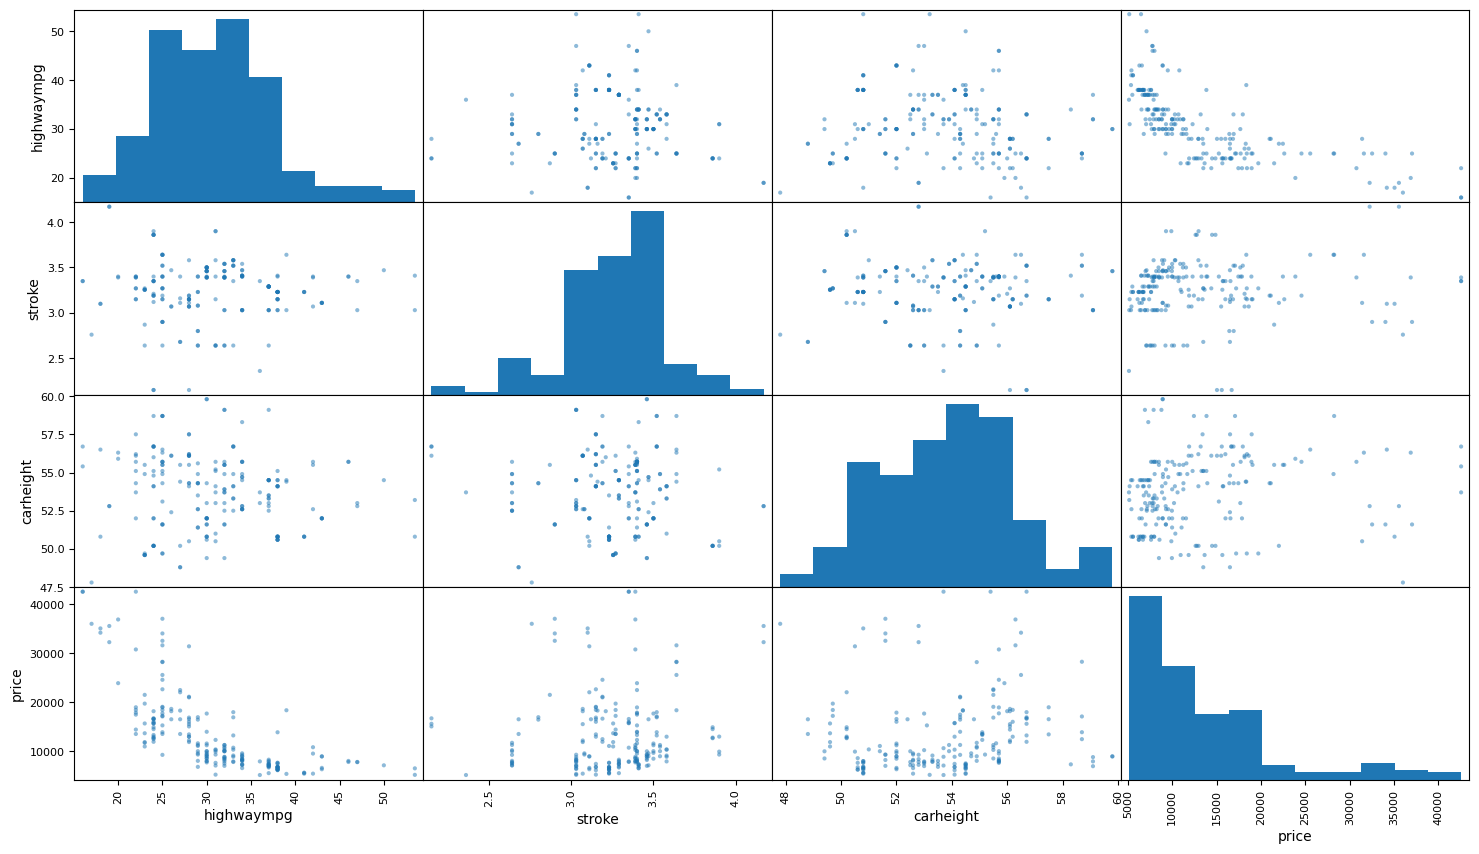

In [30]:
from pandas.plotting import scatter_matrix

attributes = ['highwaympg', 'stroke','carheight', 'price',]
scatter_matrix(car_dataframe[attributes], figsize=(18, 10))
plt.show()

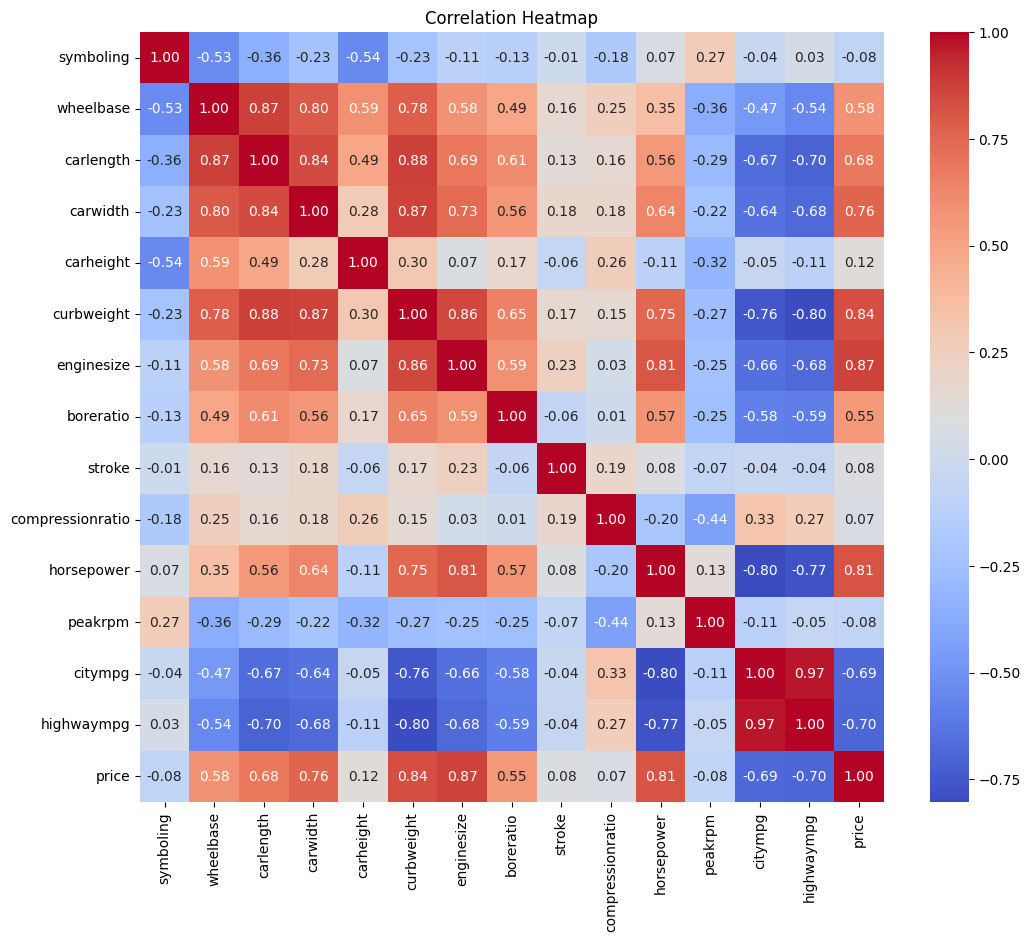

symboling          -0.081416
wheelbase           0.578459
carlength           0.683613
carwidth            0.758085
carheight           0.119383
curbweight          0.835553
enginesize          0.872712
boreratio           0.552925
stroke              0.079425
compressionratio    0.067507
horsepower          0.809836
peakrpm            -0.083867
citympg            -0.686037
highwaympg         -0.697338
price               1.000000
Name: price, dtype: float64


In [31]:
 # numeric_dataframe_prior_encoding Dataframe containing numeric features only prior encoding
numeric_dataframe_prior_encoding = car_dataframe[['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']]
correlation_matrix = numeric_dataframe_prior_encoding.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
print(correlation_matrix['price'])

**Discuss the preliminary observations about the dataset.**

>The preliminary observations about the dataset shows that there were un-ncecessay features like **car_ID and Car_Name**, which we got rid of ,as well as conducted other data preprocessing. From the visualization such as scatter plot and the co-relation matrix we can see that features such as **horsepower, enginesize, curbweight, cardwidth, citympg** have strong co-relation while **symboling , peakrpm** has low correlation to price in direct. However, we need to be aware that there could be case that two features in together could be affecting the price. So the dropping the features all the time also might not be soution, also might create overfitting problem

In [32]:
# Extracting the Independent and Dependent variables
X = car_dataframe.iloc[:, :-1].values
y = car_dataframe.iloc[:, -1].values

print("Features are =>\t", sorted(car_dataframe.columns[:-1].tolist()))
print("\n")
print("Target is => \t",car_dataframe.columns[-1])

Features are =>	 ['aspiration_std', 'aspiration_turbo', 'boreratio', 'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'carheight', 'carlength', 'carwidth', 'citympg', 'compressionratio', 'curbweight', 'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two', 'doornumber_four', 'doornumber_two', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd', 'enginelocation_front', 'enginelocation_rear', 'enginesize', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor', 'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi', 'fuelsystem_spfi', 'fueltype_diesel', 'fueltype_gas', 'highwaympg', 'horsepower', 'peakrpm', 'stroke', 'symboling', 'wheelbase']


Target is => 	 price


**Fit a regression model to predict the car `price` based on the other features in the dataset**

In [33]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [34]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [35]:
y_pred = regressor.predict(X_test)
print(X_test)
y_pred 

[[  0.  103.5 189.  ...   1.    0.    0. ]
 [  0.   99.5 178.2 ...   1.    0.    0. ]
 [  0.   97.2 173.4 ...   0.    0.    0. ]
 ...
 [  0.   94.5 155.9 ...   0.    0.    0. ]
 [  3.   95.9 173.2 ...   0.    1.    0. ]
 [  0.   97.  173.5 ...   0.    0.    0. ]]


array([28262.62372112, 20482.65597202, 10604.61472272, 13091.56310342,
       27121.24352195,  5721.42947795,  8693.587946  ,  7946.45249069,
        9018.48209412,  9492.42274178, 17117.08591177,  7636.38123718,
       17363.51925219,  8766.72007602, 41563.00897922,  6577.39908699,
        -559.85338945, 13342.69249789, 10578.49190473, 10141.49142277,
       11024.55874427, 16729.57585668,  4706.66282626,  2901.25883903,
        7218.47343139, 28559.27182512, 11711.39066234, 16743.73855673,
        5005.87364483, 17611.88845856, 27579.30867664,  6367.71921037,
        6707.17547797, 20110.89612482,  7210.50536236, 25054.43901763,
       12545.06747112, 12736.67562093,  6549.97533287, 13639.24033733,
        6942.69312552])

In [36]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8826029837566185

**Evaluate model goodness of fit**
 
The R-squared score of 0.88 indicates that the model explains 88% of the variance in the dependent variable, showcasing a strong goodness of fit. This suggests the model performs well in capturing the relationship between independent and dependent variables, making it useful for predicting the target variable. However, it's crucial to consider potential limitations such as outliers or multicollinearity to ensure the model's reliability and generalizability.

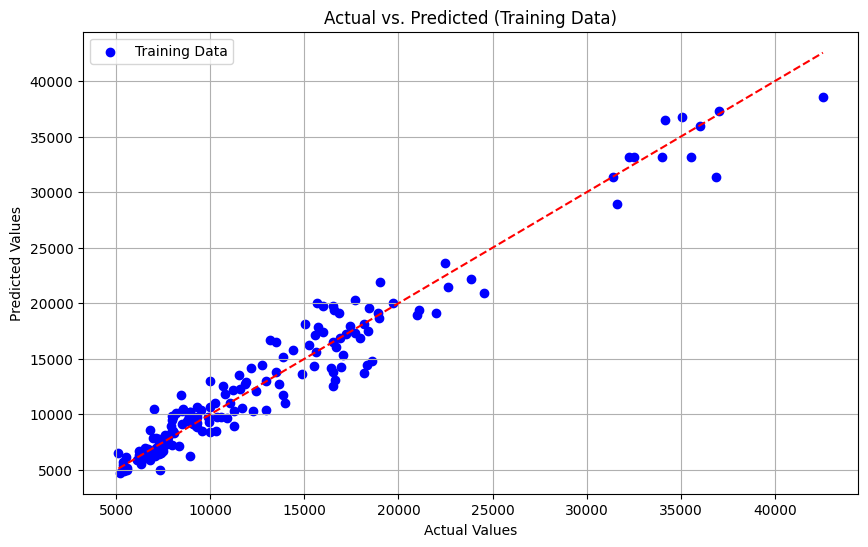

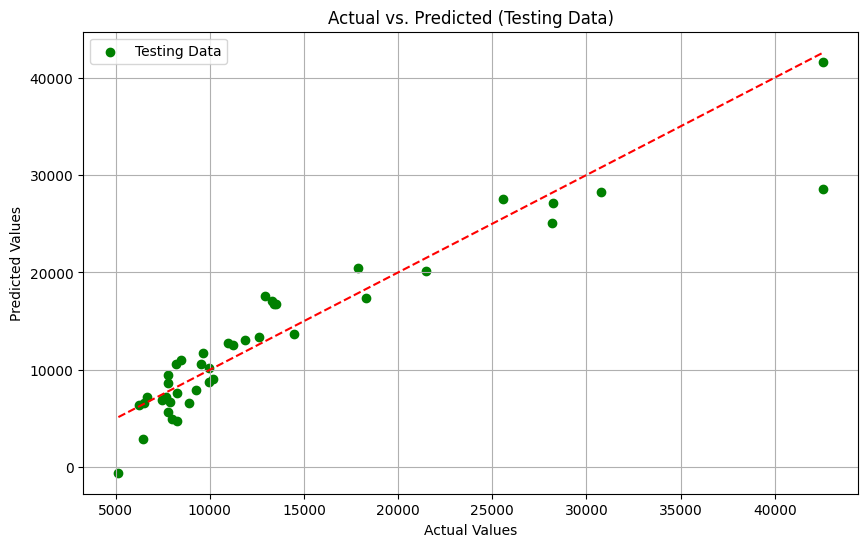

In [37]:


# Make predictions on training and testing data
train_predictions = regressor.predict(X_train)
test_predictions = regressor.predict(X_test)

# Plot the actual vs. predicted values for training data
plt.figure(figsize=(10, 6))
plt.scatter(y_train, train_predictions, color='blue', label='Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Training Data)')
plt.legend()
plt.grid(True)
plt.show()

# Plot the actual vs. predicted values for testing data
plt.figure(figsize=(10, 6))
plt.scatter(y_test, test_predictions, color='green', label='Testing Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted (Testing Data)')
plt.legend()
plt.grid(True)
plt.show()